In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##**Mempersiapkan data**

In [3]:
# Membuka dan membaca file data tangkapan ikan
data_tangkapan = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/Data DPI 2018/Hasil tangkapan dan variabel lingkungan/Hasil tangkapan & variabel lingkungan.csv')

# Mengatur kolom 'datetime' sebagai index
data_tangkapan.set_index('datetime', inplace=True)

# DROP kolom/fitur yang tidak akan dipakai (jenis ikan lainnya, musim penangkapan ikan, arah angin, dan arah arus)
data_tangkapan.drop(data_tangkapan.columns[[0, 2, 3, 4, 5, 12, 14, 16]], axis=1, inplace=True)

data_tangkapan

,Maesang (Cakalang),sst_dailymean (C),chlorofil_dailymean (mg/m^3),eastward_seawater_dailymean (m/s),northward_seawater_dailymean (m/s),eastward_wind_dailymean (m/s),northward_wind_dailymean (m/s),wind_magnitude_dailymean (m/s),seawater_magnitude_dailymean (m/s)
datetime,,,,,,,,,
1/4/2018,1320,29.312853,0.191309,0.028687,-0.075512,-4.557285,-2.767206,5.331630,0.080777
1/5/2018,4060,29.329287,0.171732,-0.056634,0.013123,-6.044079,-1.501644,6.227827,0.058134
1/6/2018,9700,29.266427,0.164844,-0.078302,0.149933,-6.126054,1.050582,6.215485,0.169148
1/7/2018,10710,29.185710,0.187319,-0.021494,0.245761,-5.290941,-1.605702,5.529225,0.246699
1/8/2018,8180,29.364286,0.183835,0.075337,0.207439,-3.340755,-3.694750,4.981147,0.220695
...,...,...,...,...,...,...,...,...,...
12/6/2022,8416,29.763572,0.114430,0.036301,0.143942,-1.114353,-0.592131,1.261904,0.148448
12/7/2022,11952,29.701425,0.114216,0.118403,0.126254,1.757081,-0.350543,1.791707,0.173088
12/8/2022,15055,29.657859,0.117090,0.262125,0.118507,5.320812,0.102421,5.321797,0.287669


##**Karakteristik Data**

In [4]:
data_tangkapan.describe()

,Maesang (Cakalang),sst_dailymean (C),chlorofil_dailymean (mg/m^3),eastward_seawater_dailymean (m/s),northward_seawater_dailymean (m/s),eastward_wind_dailymean (m/s),northward_wind_dailymean (m/s),wind_magnitude_dailymean (m/s),seawater_magnitude_dailymean (m/s)
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,11626.063277,29.576088,0.121084,0.077793,0.094739,-0.556522,-0.065850,3.362331,0.257819
std,9277.152659,0.538140,0.029756,0.210380,0.154093,3.047211,2.198474,1.766735,0.128577
min,0.000000,27.490718,0.069022,-0.556919,-0.612794,-7.425743,-6.757535,0.126862,0.010399
25%,4850.000000,29.222677,0.101894,-0.074716,0.005328,-2.773211,-1.597711,2.020183,0.167134
50%,9490.500000,29.669646,0.116603,0.081528,0.104259,-0.881728,0.110049,3.156173,0.247614
75%,15421.500000,29.987676,0.135312,0.233456,0.200201,1.367580,1.444928,4.454656,0.331049
max,61992.000000,30.840713,0.321837,0.855139,0.492351,9.251405,8.513432,9.300298,0.908676


##**Distribusi Data**

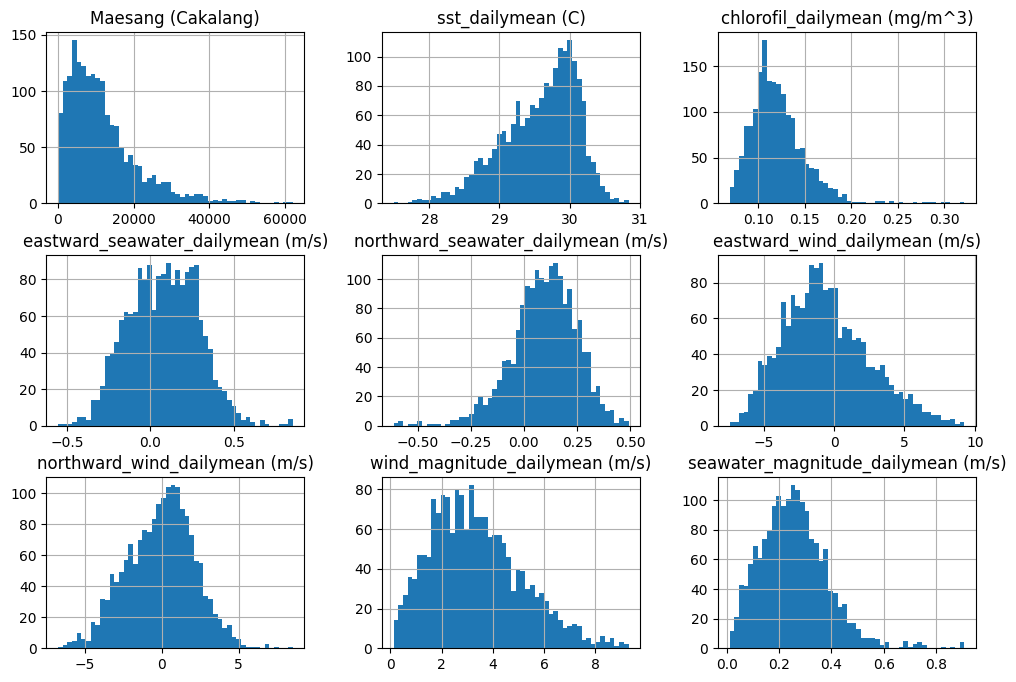

In [13]:
data_tangkapan.hist(bins=50, figsize=(12,8))
plt.show()

##**Tren Data**

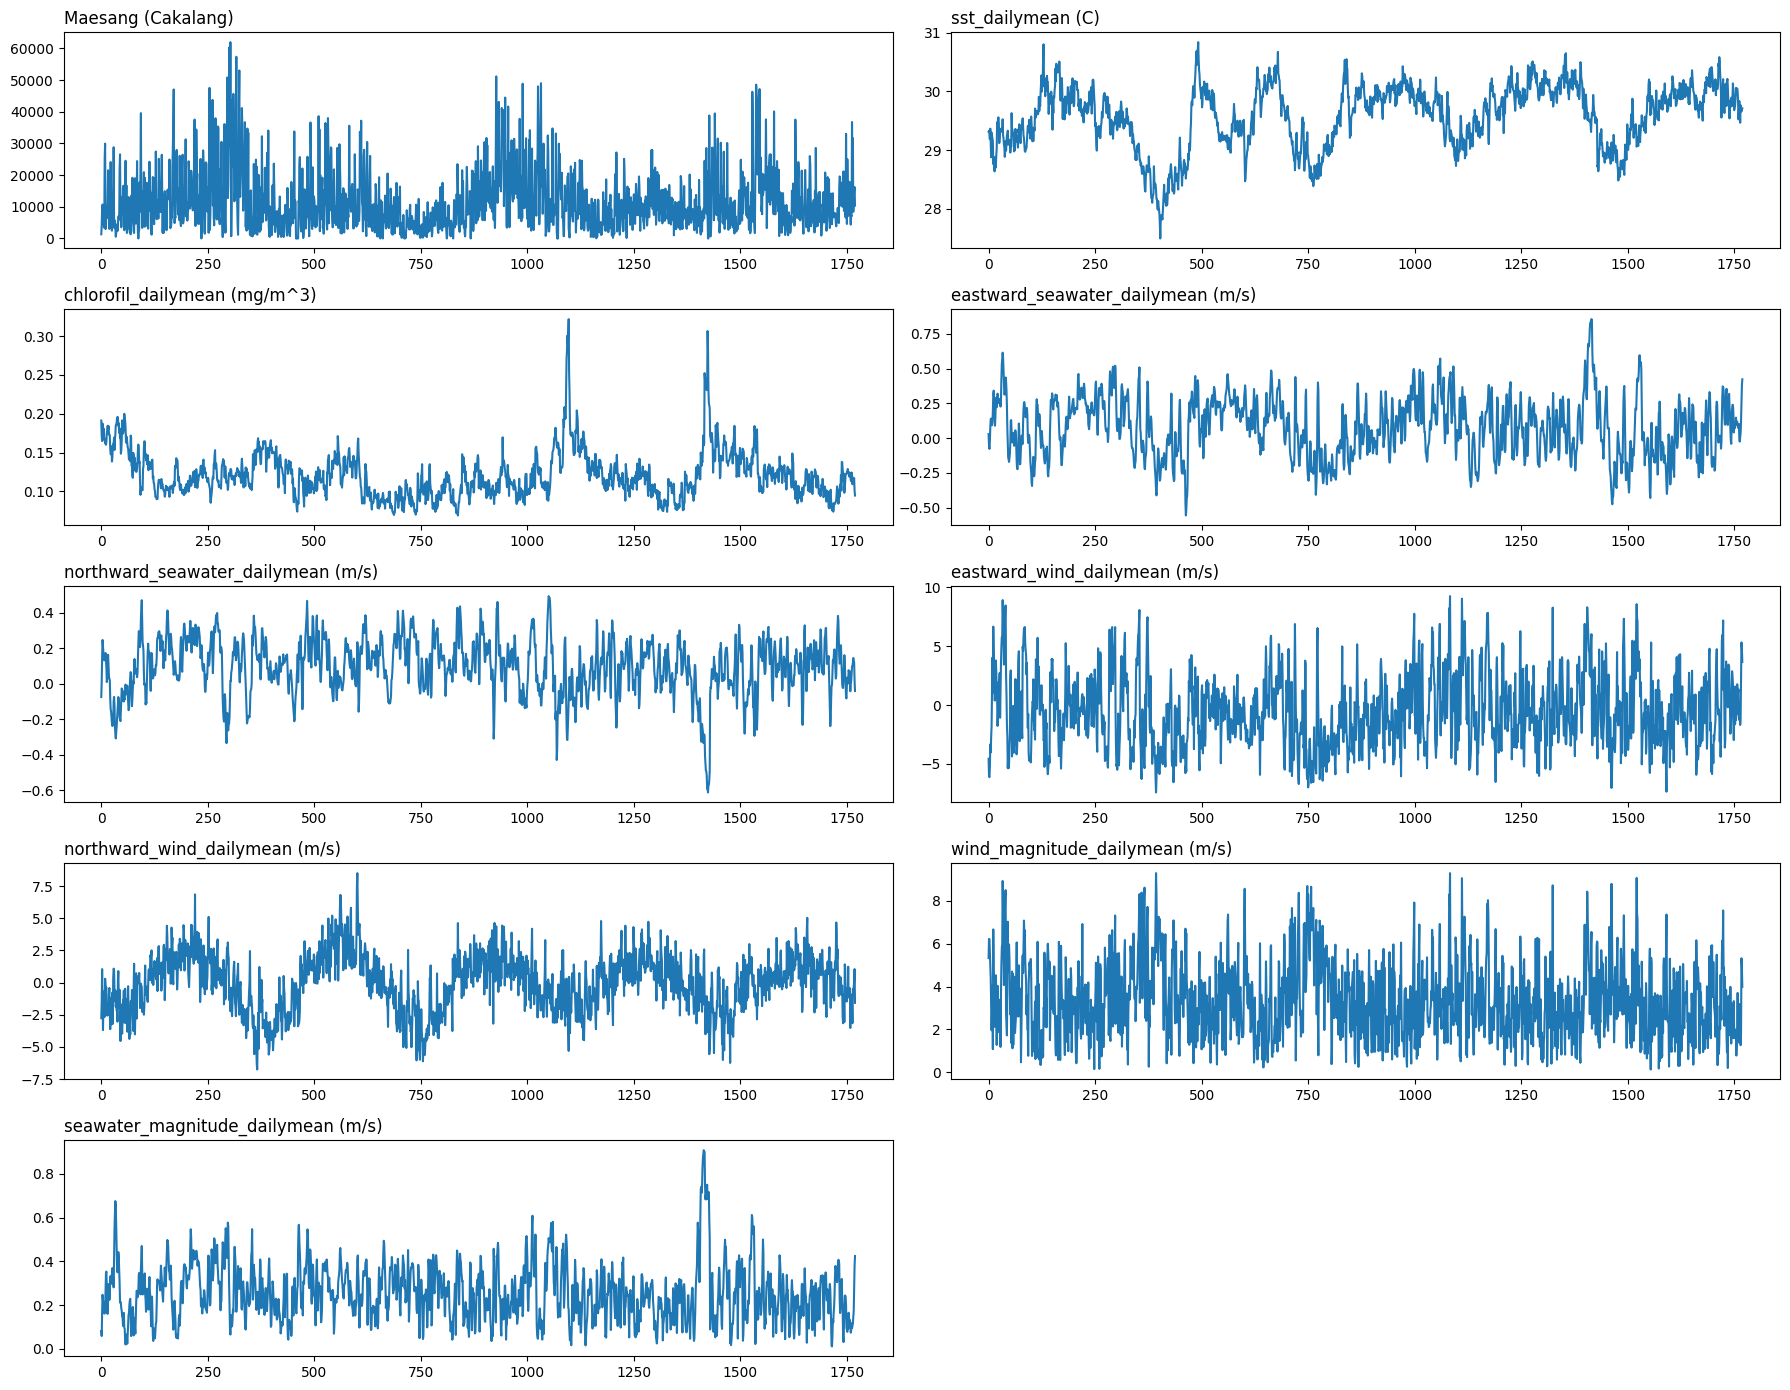

In [17]:
# Setting 'datetime' as index
values = data_tangkapan.values

# Number of subplots
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8]
num_subplots = len(groups)

# Determine the number of rows and columns for the subplot grid
num_rows = int(num_subplots / 2) + num_subplots % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 14))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each column in a subplot
for i, column in enumerate(groups):
    axes[i].plot(values[:, column])
    axes[i].set_title(data_tangkapan.columns[column], loc='left')
    axes[i].title.set_position([1.0, 1.0])  # Adjust position to top right

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##**Hubungan Antar Variabel**

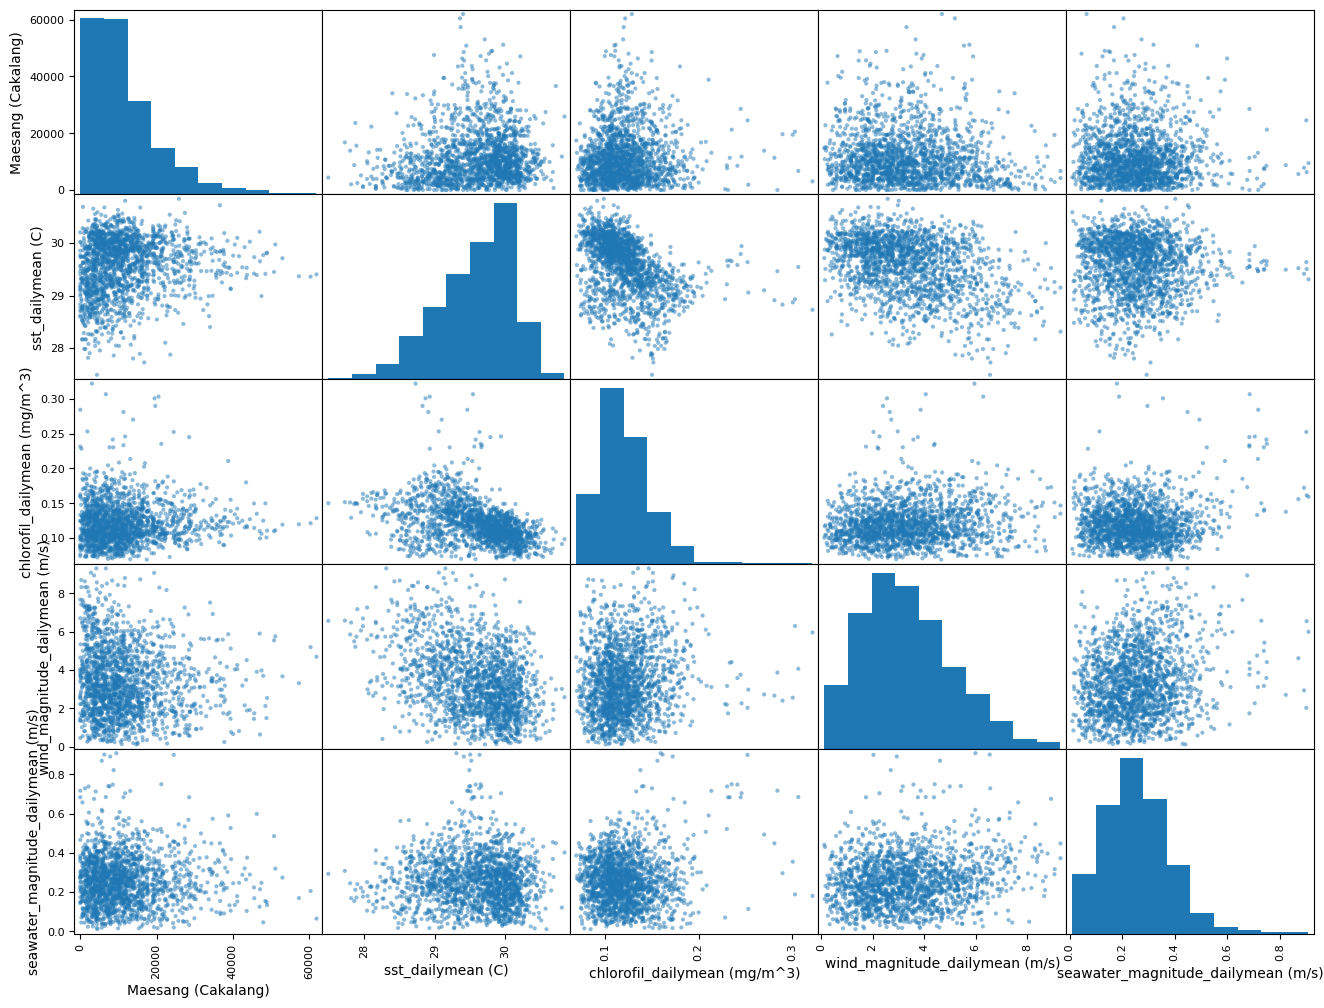

In [10]:
# VISUALISASI hubungan antar variabel

#attributes = ["Maesang (Cakalang)", "sst_dailymean (C)", "chlorofil_dailymean (mg/m^3)", "northward_wind_dailymean (m/s)", "eastward_wind_dailymean (m/s)",
#              "northward_seawater_dailymean (m/s)", "eastward_seawater_dailymean (m/s)", "wind_magnitude_dailymean (m/s)", "seawater_magnitude_dailymean (m/s)"]

attributes = ["Maesang (Cakalang)", "sst_dailymean (C)", "chlorofil_dailymean (mg/m^3)", "wind_magnitude_dailymean (m/s)", "seawater_magnitude_dailymean (m/s)"]

plot_hubungan_variabel = scatter_matrix(data_tangkapan[attributes], figsize=(16, 12))

plt.show()

In [11]:
# NILAI KORELASI antar variabel yang dinyatakan dalam KOEFISIEN KORELASI PEARSON

matriks_korelasi = data_tangkapan.corr()
matriks_korelasi['Maesang (Cakalang)'].sort_values(ascending=False)

Maesang (Cakalang)                    1.000000
sst_dailymean (C)                     0.117312
northward_wind_dailymean (m/s)        0.114579
eastward_seawater_dailymean (m/s)     0.070810
chlorofil_dailymean (mg/m^3)          0.039905
northward_seawater_dailymean (m/s)   -0.006500
eastward_wind_dailymean (m/s)        -0.011691
seawater_magnitude_dailymean (m/s)   -0.017430
wind_magnitude_dailymean (m/s)       -0.086881
Name: Maesang (Cakalang), dtype: float64